In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'D:\Drone-Swarm-Detection-with-AWR2243\Our data\Radar_Data\metal_plate_distance_3m\master_0000_data.bin'
frameIdx = 50  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 64  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Display some results
print(adcDataComplex[1, 0, 0, 0])  # Display sample value
print("Size of chirp_ADC_matrix:", chirp_ADC_matrix.shape)

# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]
# Initialize an empty list to store each chirp
all_chirps = []

# Loop over loops and chirps per loop
for i in range(64):
    for j in range(12):
        # Append each chirp to the list
        all_chirps.append(chirp_ADC_matrix[:, i, j])

# Convert the list to a numpy array and reshape it to (768, 256)
all_chirps = np.array(all_chirps).reshape(768, 256)

# Display the size and some sample data
print("Size of the all_chirps matrix:", all_chirps.shape)
print("First chirp (first loop, first chirp):", all_chirps[767])


# print("Size of first_chirp_first_loop:", first_chirp_first_loop.shape[0])
# print(first_chirp_first_loop)
# # Reshape chirp_ADC_matrix to (768, 256)
# # We flatten the chirps across loops and chirps per loop into a single dimension (768 chirps total)
# chirps_matrix = np.reshape(chirp_ADC_matrix, (256,768))

# # Display the size and some sample data
# print("Size of the chirps matrix:", chirps_matrix.shape)
# print("First chirp (first loop, first chirp):", chirps_matrix[0])


(-242+126j)
Size of chirp_ADC_matrix: (256, 64, 12)
Size of the all_chirps matrix: (768, 256)
First chirp (first loop, first chirp): [ -88.+443.j -287.+195.j -515.+120.j -221.-272.j -302.-158.j   15.-211.j
  -20.-221.j  172.-151.j  213.+169.j -134.+152.j -216.+337.j -467.-238.j
  -91. -98.j  163.-426.j   94.+242.j  -27.+189.j -344.+273.j -544.-115.j
 -310.-354.j -256.-543.j  217.-362.j   44.-332.j  365.+178.j  140. +32.j
 -172.+304.j -228. -49.j -360.-190.j -181.-215.j  -40.-401.j  -27. -87.j
  157.-176.j -193. -98.j   25. -12.j  -80.-198.j -129.-221.j   -9.-271.j
  -59.-366.j  271.-142.j   80.-258.j   56.+298.j  -74.  -3.j -389.-156.j
  -67.-404.j  168.-356.j  207.-114.j  118. -39.j -357.-140.j   81.-268.j
  -26.-493.j  229.-110.j  177.-211.j  143.-110.j  260.-165.j  187.  -7.j
   33.+294.j -168.-161.j -397.-248.j  162.-552.j  236.-368.j  425. -42.j
   72. +52.j  -29. -51.j  100.-226.j  108.-322.j  230.+111.j   74.-279.j
  -53.-215.j  443.-443.j  494. +68.j  365.+396.j -290.+334.j -51

(768, 256)
[[ -41.+339.j  -57.+347.j  -41.+329.j ... -108.+455.j -106.+443.j
   -88.+443.j]
 [-242.+126.j -240.+113.j -244.+129.j ... -305.+183.j -306.+195.j
  -287.+195.j]
 [-402.+127.j -386.+109.j -368.+105.j ... -504.+132.j -513.+131.j
  -515.+120.j]
 ...
 [-228. +29.j -222. +34.j -218. +40.j ... -240. +35.j -239. +35.j
  -213. +20.j]
 [ -62.+125.j  -59.+117.j  -69.+126.j ...  -96.+112.j  -79.+111.j
   -89.+100.j]
 [-137.+272.j -146.+293.j -144.+261.j ... -166.+242.j -167.+247.j
  -176.+256.j]]


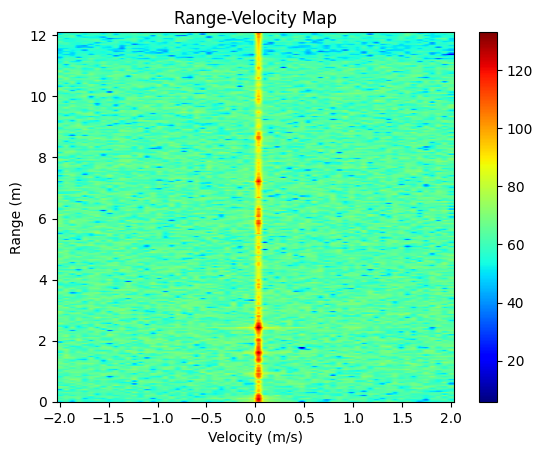

In [26]:
print(all_chirps.shape)
# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.transpose(all_chirps)

# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 3.16e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 40e-6  # Chirp duration (40 microseconds)

# Number of FFT points for the range dimension
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))

# Number of FFT points for the Doppler dimension
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numLoops * chirpDuration*12)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define file path and parameters
fileFullPath = r'E:\Data_Set\Phanton_4_forward_02\new_four\master_0000_data.bin'
frameIdx = 79  # Index of the frame to read
numSamplePerChirp = 256  # Number of samples per chirp
numChirpPerLoop = 12  # Number of chirps per loop
numLoops = 128  # Number of loops per frame
numRXPerDevice = 4  # Number of receiving channels per device
numDevices = 4  # Number of devices in the cascade (if needed)

# Function to read binary radar data
def readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice):
    Expected_Num_SamplesPerFrame = numSamplePerChirp * numChirpPerLoop * numLoops * numRXPerDevice * 2
    with open(fileFullPath, 'rb') as fp:
        # Move to the desired frame in the file
        fp.seek((frameIdx - 1) * Expected_Num_SamplesPerFrame * 2)
        adcData1 = np.fromfile(fp, dtype=np.uint16, count=Expected_Num_SamplesPerFrame)

    # Convert the 16-bit data to signed integers
    neg = (adcData1 >> 15) == 1  # Check the sign bit
    adcData1 = adcData1.astype(np.int32)
    adcData1[neg] -= 2**16

    # Combine the I and Q channels into complex values
    adcData1 = adcData1[0::2] + 1j * adcData1[1::2]

    # Reshape and permute the data
    adcData1Complex = np.reshape(adcData1, (numRXPerDevice, numSamplePerChirp, numChirpPerLoop, numLoops), order='F')
    adcData1Complex = np.transpose(adcData1Complex, (1, 3, 0, 2))  # Permute dimensions
    return adcData1Complex

# Read radar data
adcDataComplex = readBinFile(fileFullPath, frameIdx, numSamplePerChirp, numChirpPerLoop, numLoops, numRXPerDevice)

# Select antenna index and extract chirp ADC matrix
antennaIdx = 0  # Indexing starts from 0 in Python
chirp_ADC_matrix = adcDataComplex[:, :, antennaIdx, :]

# Display some results
print(adcDataComplex[1, 0, 0, 0])  # Display sample value
print("Size of chirp_ADC_matrix:", chirp_ADC_matrix.shape)

# Extract first chirp of the first loop
first_chirp_first_loop = chirp_ADC_matrix[:, 0, 0]
# Initialize an empty list to store each chirp
all_chirps = []

# Loop over loops and chirps per loop
for i in range(64):
    for j in range(12):
        # Append each chirp to the list
        all_chirps.append(chirp_ADC_matrix[:, i, j])

# Convert the list to a numpy array and reshape it to (768, 256)
all_chirps = np.array(all_chirps).reshape(768, 256)

# Display the size and some sample data
print("Size of the all_chirps matrix:", all_chirps.shape)
print("First chirp (first loop, first chirp):", all_chirps[767])




(-18-81j)
Size of chirp_ADC_matrix: (256, 128, 12)
Size of the all_chirps matrix: (768, 256)
First chirp (first loop, first chirp): [-434. -81.j -535. -90.j -568.-100.j -643. -69.j -636. -68.j -635.-104.j
 -591. -76.j -577. -46.j -579. -42.j -475.-107.j -428. -76.j -365. -76.j
 -279. -66.j -276. -42.j -212. -47.j -156. -46.j -117. -44.j  -79. -55.j
  -32. -46.j    4. -37.j   26. -62.j   54. -44.j   79. -33.j   97. -39.j
  102. -41.j  117. -15.j   79. -13.j   83. -20.j   94. -14.j   80. -26.j
   41.  -3.j   55. -34.j   53. -42.j   49. -23.j   45.  -1.j   11.  -2.j
   -6. +13.j  -18. -36.j  -16.  +6.j  -36. -30.j   20.  -3.j  -42. -26.j
   12.  -7.j  -33. +56.j  -48. -18.j   -9.  +8.j  -78. +32.j  -51. -25.j
    0. -20.j  -38. +42.j  -60. -89.j   48. -44.j   43. +52.j  -46. -16.j
   58. -15.j   47. +51.j  -17. +91.j  -64.  +4.j   -1. -18.j  -16. +26.j
  -43.  -1.j  -19. -77.j   19. -53.j   75. -49.j   52.  +0.j   28. -12.j
  100. +16.j   14. +81.j  -22. +42.j   20. +21.j    2. +30.j  -49

(768, 256)
[[ -24. -36.j   63.+192.j   21.-129.j ...  -47. +48.j -108.-155.j
  -434. -81.j]
 [ -18. -81.j  122.+262.j   11.-187.j ...  -91. +94.j -128.-187.j
  -535. -90.j]
 [  14. -67.j  191.+267.j  -22.-258.j ...  -61. +76.j -155.-171.j
  -568.-100.j]
 ...
 [   9.  -2.j   21. +29.j  -44. -27.j ...  -10. +72.j   22. +15.j
    38.  +0.j]
 [  13. -16.j  -16.  +3.j   -5. -23.j ...  -56. +27.j  -14.  +1.j
    17. +20.j]
 [  18.  -1.j   21.  -5.j  -17. -16.j ...  -76. -23.j   -2. -27.j
   -23.  -3.j]]


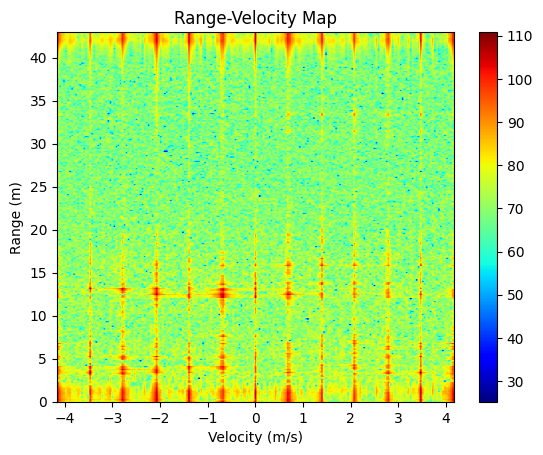

In [30]:
print(all_chirps.shape)
# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.transpose(all_chirps)

# Output the reshaped matrix
print(chirps_matrix)
# Constants (adjust based on your radar parameters)
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.89e9  # Bandwidth of the FMCW radar sweep (3.16 GHz)
chirpDuration = 30e-6  # Chirp duration (40 microseconds)

# Number of FFT points for the range dimension
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))

# Number of FFT points for the Doppler dimension
Nfft_doppler =197

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numLoops * chirpDuration*12)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)

# Doppler axis for plotting (ensure symmetry around 0)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)

# Convert Doppler frequency to velocity (m/s)
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(np.abs(doppler_fft)), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar()

(768, 256)
[[ -23. -39.j   74.+187.j   -7.-183.j ...   15. -34.j    2. -94.j
  -148. -76.j]
 [ -23. -88.j   93.+257.j   -1.-211.j ...  -21.  +7.j   -8. -87.j
  -221. -83.j]
 [  27. -57.j  184.+271.j   10.-315.j ...   -7.  +3.j  -75. -98.j
  -334. -58.j]
 ...
 [  16. -25.j   23. +37.j  -29. -18.j ...  -25. +75.j   28.  +9.j
    50.  +0.j]
 [  21. -12.j  -30.  +4.j  -24. -15.j ...  -62. +37.j   -4.  +8.j
   -27. +41.j]
 [   4.  -4.j   21. -41.j   -6. -19.j ...  -60. -27.j  -16. -32.j
   -44. +18.j]]


TypeError: Invalid shape (256,) for image data

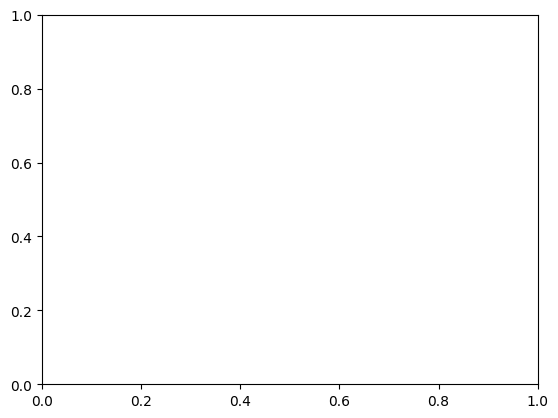

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming all_chirps is defined and has the correct shape (256, 768)
print(all_chirps.shape)

# Reshape the complex array into a matrix of shape (256, 768)
chirps_matrix = np.transpose(all_chirps)

# Output the reshaped matrix
print(chirps_matrix)

# Radar parameters
fc = 77e9  # Radar operating frequency (77 GHz for mmWave radar)
c = 3e8  # Speed of light (m/s)
sweepBandwidth = 0.89e9  # Bandwidth of the FMCW radar sweep (0.89 GHz)
chirpDuration = 30e-6  # Chirp duration (30 microseconds)
numSamplePerChirp = 256  # ADC samples per chirp
numLoops = 128  # Number of chirps in the frame

# Number of FFT points for the range and Doppler dimensions
Nfft_range = 2 ** int(np.ceil(np.log2(numSamplePerChirp)))
Nfft_doppler = 2 ** int(np.ceil(np.log2(numLoops)))

# Perform 2D FFT along both the range (ADC samples) and Doppler (chirps) dimensions
range_fft = np.fft.fft(chirps_matrix, Nfft_range, axis=0)  # FFT across range (ADC samples)
doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, Nfft_doppler, axis=1), axes=1)  # FFT across Doppler (chirps), with shift

# Calculate the range and velocity axis values
range_res = c / (2 * sweepBandwidth)  # Range resolution (meters)
max_range = range_res * (Nfft_range - 1)  # Maximum measurable range
range_axis = np.linspace(0, max_range, Nfft_range)  # Range axis for plotting

doppler_res = 1 / (numLoops * chirpDuration*12)  # Doppler resolution (Hz)
max_doppler = doppler_res * (Nfft_doppler / 2)  # Maximum Doppler shift (Hz)
doppler_axis = np.linspace(-max_doppler, max_doppler, Nfft_doppler)  # Doppler axis for plotting
velocity_axis = doppler_axis * (c / (2 * fc))  # Velocity axis using Doppler shift

# Averaging over the Doppler dimension for a 2D Range-Velocity Map
doppler_avg = np.mean(np.abs(doppler_fft), axis=1)

# Plot the Range-Velocity map (absolute value of FFT)
plt.figure()
plt.imshow(20 * np.log10(doppler_avg), aspect='auto', extent=[velocity_axis[0], velocity_axis[-1], range_axis[0], range_axis[-1]], origin='lower', cmap='jet')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range-Velocity Map')
plt.colorbar(label='Magnitude (dB)')
plt.show()


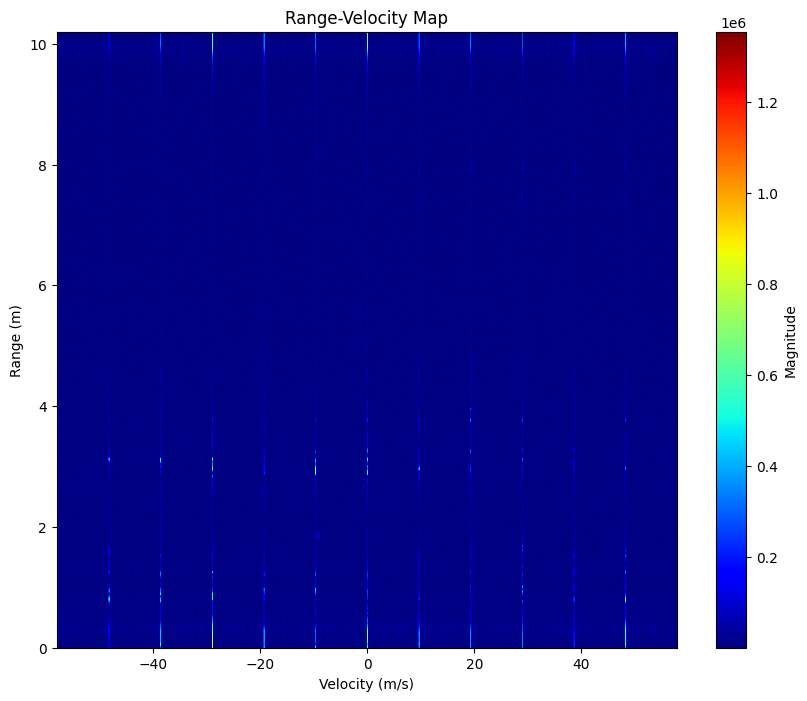

In [21]:
def convert_range_bins_to_range(range_bins, range_resolution=0.1668):
    #range_resolution = speedOfLight/(2*chirpBandwidth)
    #maxRange            = speedOfLight*adcSampleRate*chirpRampTime/(2*chirpBandwidth);
    return range_bins * range_resolution

def convert_doppler_bins_to_velocity(doppler_bins, velocity_resolution=0.034):
    #maximumVelocity     = lambda / (chirpInterval*4) ; % m/s
    # velocityResolution  = lambda / (2*nchirp_loops * chirpInterval*numTxAnt);
    return doppler_bins * velocity_resolution
def range_doppler_map(radar_data: np.ndarray) -> np.ndarray:
    """Compute range-doppler map from radar signal."""
    # Perform 1D FFT across the range dimension (samples) for each chirp
    range_fft = np.fft.fft(radar_data, axis=1)
   

    # Perform 1D FFT across the Doppler dimension (chirps) after the range FFT
    doppler_fft = np.fft.fftshift(np.fft.fft(range_fft, axis=0), axes=0)

    # Compute the magnitude (absolute value) of the result
    magnitude = np.abs(doppler_fft)
    return magnitude

magnitude = range_doppler_map(np.transpose(chirps_matrix))

# Convert range and Doppler bins to physical units
range_bins = np.arange(magnitude.shape[1])
doppler_bins = np.arange(-magnitude.shape[0]//2, magnitude.shape[0]//2)

range_meters = convert_range_bins_to_range(range_bins)
velocity_mps = convert_doppler_bins_to_velocity(doppler_bins)

# Rotate the magnitude array by 90 degrees counterclockwise
magnitude = np.rot90(magnitude)

# Plot the Range-Doppler Map with velocity on the x-axis and range on the y-axis
plt.figure(figsize=(10, 8))
plt.imshow(magnitude, aspect='auto', cmap='jet', 
            extent=[velocity_mps[0], velocity_mps[-1], range_meters[0], range_meters[-1]])
plt.colorbar(label='Magnitude')
plt.title('Range-Velocity Map')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.show()